# Google Play Store Apps

Google Play store has huge numbers of Apps. It allows users to search for Apps, check reviews, install Apps and rate Apps. Investigating these Apps can help the Apps publishers in making there decisions when developing Apps. In this notebook, I will analyze a dataset of [Google Play store](https://www.kaggle.com/lava18/google-play-store-apps) that contains data of 2018. 

### Dataset

The dataset contains 13 features: 

* *App:* Application name
* *Category:* Category the app belongs to
* *Rating:* Overall user rating of the app 
* *Reviews:* Number of user reviews for the app 
* *Size:* Size of the app 
* *Installs:* Number of user downloads/installs for the app 
* *Type:* Paid or Free
* *Price:* Price of the app 
* *Content Rating:* Age group the app is targeted at - Children / Mature 21+ / Adult
* *Genres:* An app can belong to multiple genres (apart from its main category). For e.g., a musical family game will belong to Music, Game, Family
* *Last Updated:* Date when the app was last updated on Play Store 
* *Current Ver:* Current version of the app available on Play Store 
* *Android Ver:* Min required Android version 



In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


In [2]:
# Read data from csv file
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape

(10841, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## 1. Data Wrangling

### Removing Null Values 

In [6]:
# Shows number of null rows in each column
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
# Remove null values in 'Rating' column
df.dropna(subset = ['Rating'], axis = 0, inplace = True)
df.head() 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
# Shows number of null rows in each column
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [9]:
# Remove null values in 'Current Ver', 'Android Ver' and 'Content Rating' columns
df.dropna(subset=['Current Ver', 'Android Ver', 'Content Rating'], axis = 0, inplace = True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
# Shows number of null rows in each column
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Removing Duplicated Rows 

In [11]:
# Drop dublicate rows
df = df.drop_duplicates()

In [12]:
df.shape

(8886, 13)

### Correcting Invalid Values

In [13]:
# Convert Last Updated type to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8886 non-null   object        
 1   Category        8886 non-null   object        
 2   Rating          8886 non-null   float64       
 3   Reviews         8886 non-null   object        
 4   Size            8886 non-null   object        
 5   Installs        8886 non-null   object        
 6   Type            8886 non-null   object        
 7   Price           8886 non-null   object        
 8   Content Rating  8886 non-null   object        
 9   Genres          8886 non-null   object        
 10  Last Updated    8886 non-null   datetime64[ns]
 11  Current Ver     8886 non-null   object        
 12  Android Ver     8886 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 971.9+ KB


## 2. Data Exploratory

### Most Popular Category
The most popular category that has the largest number of installs.

In [15]:
# Convert 'Installs' column to suitable format 
# Remove '+' and ','
df['Installs Num'] = df['Installs'].str[:-1].apply(lambda x: x.replace(',', ""))
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs Num
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,100000


In [16]:
# Convert 'Installs Num' to numeric
df['Installs Num'] = pd.to_numeric(df['Installs Num'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8886 non-null   object        
 1   Category        8886 non-null   object        
 2   Rating          8886 non-null   float64       
 3   Reviews         8886 non-null   object        
 4   Size            8886 non-null   object        
 5   Installs        8886 non-null   object        
 6   Type            8886 non-null   object        
 7   Price           8886 non-null   object        
 8   Content Rating  8886 non-null   object        
 9   Genres          8886 non-null   object        
 10  Last Updated    8886 non-null   datetime64[ns]
 11  Current Ver     8886 non-null   object        
 12  Android Ver     8886 non-null   object        
 13  Installs Num    8886 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(11)


In [17]:
# Group installs numbers by categories  
categories = df.groupby(['Category']).sum()['Installs Num']
categories

Category
ART_AND_DESIGN           124228100
AUTO_AND_VEHICLES         53129800
BEAUTY                    26916200
BOOKS_AND_REFERENCE     1916291655
BUSINESS                 863518120
COMICS                    56036100
COMMUNICATION          24152241530
DATING                   206522410
EDUCATION                533852000
ENTERTAINMENT           2455660000
EVENTS                    15949410
FAMILY                 10041080590
FINANCE                  770312400
FOOD_AND_DRINK           257777750
GAME                   31543862717
HEALTH_AND_FITNESS      1361006220
HOUSE_AND_HOME           125082000
LIBRARIES_AND_DEMO        61083000
LIFESTYLE                534741120
MAPS_AND_NAVIGATION      724267560
MEDICAL                   42162676
NEWS_AND_MAGAZINES      5393110650
PARENTING                 31116110
PERSONALIZATION         2074341930
PHOTOGRAPHY             9721243130
PRODUCTIVITY           12463070180
SHOPPING                2573331540
SOCIAL                 12513841475
SPORTS     

In [18]:
# Sort by number of intalls
categories = pd.DataFrame(categories).sort_values(by = "Installs Num", ascending = False).reset_index()
categories

,Category,Installs Num
0,GAME,31543862717
1,COMMUNICATION,24152241530
2,SOCIAL,12513841475
3,PRODUCTIVITY,12463070180
4,TOOLS,11450224500
5,FAMILY,10041080590
6,PHOTOGRAPHY,9721243130
7,TRAVEL_AND_LOCAL,6361859300
8,VIDEO_PLAYERS,6221897200
9,NEWS_AND_MAGAZINES,5393110650


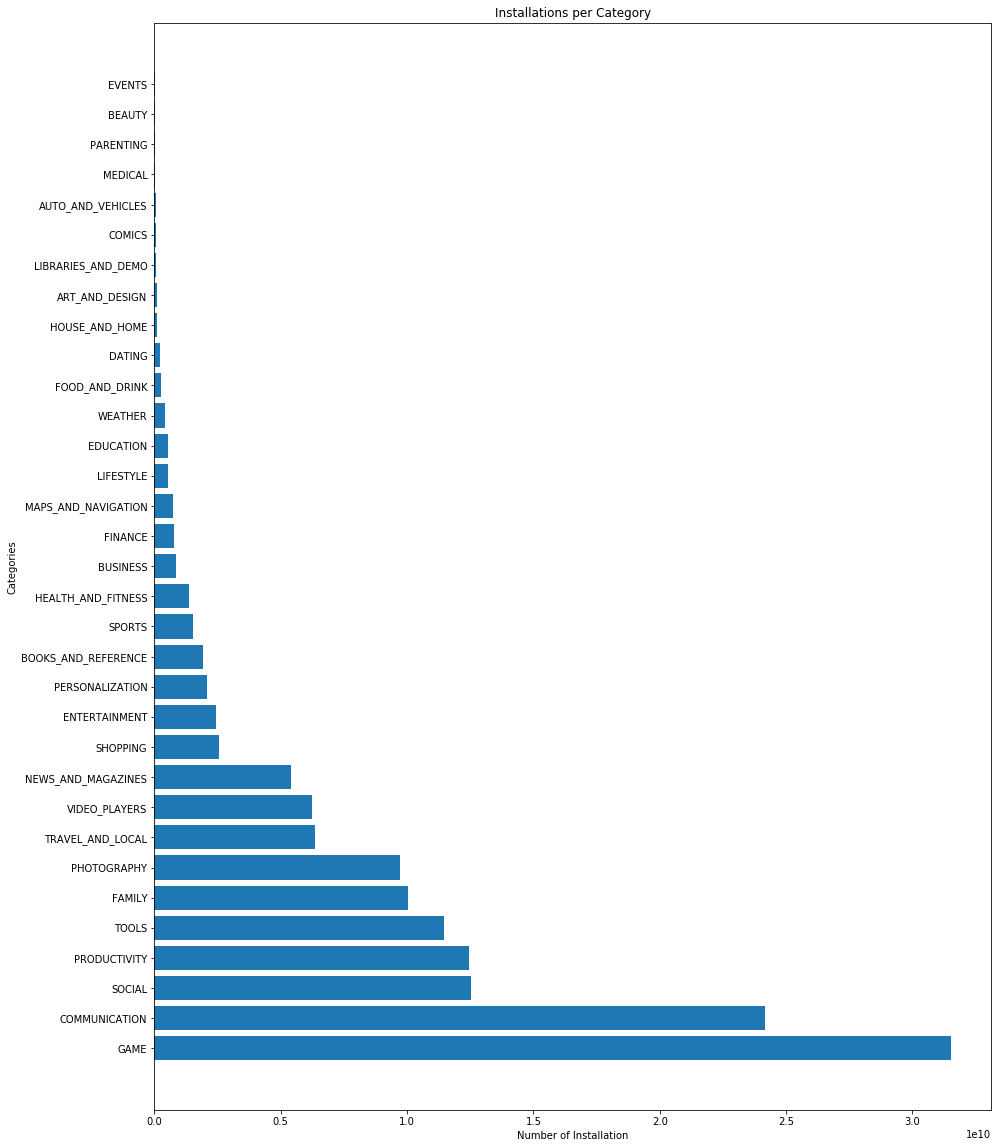

In [19]:
# Show installations per categoty in bar chart
fig, ax = plt.subplots(figsize = (15, 20))
ax.barh(categories['Category'], categories['Installs Num'])
ax.set_xlabel('Number of Installation')
ax.set_ylabel('Categories')
ax.set_title('Installations per Category')
plt.show()

## App with the Largest Size
Find the application that has the largest size.

In [20]:
# Check the values of the Apps sizes
pd.unique(df['Size'])

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [21]:
# Convert size values
def convert_size(s):
    
    # Remove .0 value
    s['Size2'] = s['Size'].replace('.0','')
    
    # Remove '.'
    s['Size2'] = s['Size2'].replace('.','')
    
    # Convert k to 000,  M to 000000 and 'Varies with device' to 1 
    if ('k' in s['Size2']):
        s['Size2'] = s['Size2'].replace('k','000')
    elif ('M' in s['Size2']):
        s['Size2'] = s['Size2'].replace('M','000000')
    else :
        s['Size2'] = 1
    s['Size2'] = pd.to_numeric(s['Size2'], errors='coerce')
    
    return s

# Apply the function
df = df.apply(convert_size, axis=1)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs Num,Size2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,10000,19000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,500000,14000000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,5000000,87000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,50000000,25000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,100000,28000000


In [22]:
# Create a dataframe for known size
df_known_size = df[df['Size2'] != 1]
df_known_size.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs Num,Size2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,10000,19000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,500000,14000000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,5000000,87000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,50000000,25000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,100000,28000000


In [23]:
# Get the max value
df_known_size[df_known_size['Size2'] == df_known_size['Size2'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs Num,Size2
1080,Post Bank,FINANCE,4.5,60449,100M,"1,000,000+",Free,0,Everyone,Finance,2018-07-23,2.9.12,4.0 and up,1000000,100000000
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100M,"10,000,000+",Free,0,Everyone,Lifestyle;Pretend Play,2018-07-16,9.0,4.0 and up,10000000,100000000
1758,Hungry Shark Evolution,GAME,4.5,6074334,100M,"100,000,000+",Free,0,Teen,Arcade,2018-07-25,6.0.0,4.1 and up,100000000,100000000
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100M,"5,000,000+",Free,0,Everyone,Sports,2018-07-20,3.04.1,4.0.3 and up,5000000,100000000
1988,Hungry Shark Evolution,GAME,4.5,6074627,100M,"100,000,000+",Free,0,Teen,Arcade,2018-07-25,6.0.0,4.1 and up,100000000,100000000
2299,Navi Radiography Pro,MEDICAL,4.7,11,100M,500+,Paid,$15.99,Everyone,Medical,2018-01-14,1.2.0,4.0.3 and up,500,100000000
3973,Hungry Shark Evolution,GAME,4.5,6071542,100M,"100,000,000+",Free,0,Teen,Arcade,2018-07-25,6.0.0,4.1 and up,100000000,100000000
4690,Vi Trainer,HEALTH_AND_FITNESS,3.6,124,100M,"5,000+",Free,0,Everyone,Health & Fitness,2018-08-02,2.0.0.11,5.0 and up,5000,100000000
5427,Ultimate Tennis,SPORTS,4.3,183004,100M,"10,000,000+",Free,0,Everyone,Sports,2018-07-19,2.29.3118,4.0.3 and up,10000000,100000000
5530,The Walking Dead: Our World,GAME,4.0,22435,100M,"1,000,000+",Free,0,Teen,Action,2018-08-01,1.1.0.3,5.0 and up,1000000,100000000


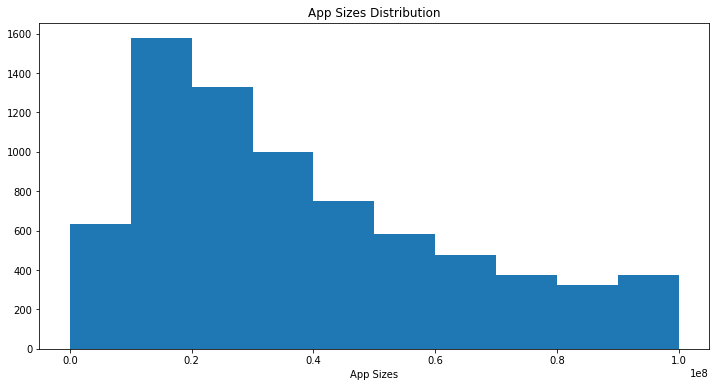

In [24]:
#The distribution of the apps sizes
fig, ax = plt.subplots(figsize = (12, 6))
ax.hist(df_known_size['Size2'])
ax.set_xlabel('App Sizes')
ax.set_title('App Sizes Distribution')
plt.show()

You can notice that, the largest size is 100 M and the size of the most apps is between 20 M and 30 M.

## App Which Hasn't been Updated
Which app has not been updated for a long time. This can be done by comparing the current date with the last date that the app was actually updated.

In [25]:
# Check the last updated year and number of apps
updates_df = pd.DataFrame(df.groupby(df['Last Updated'].dt.year).count()['App']).reset_index()
updates_df

,Last Updated,App
0,2010,1
1,2011,15
2,2012,21
3,2013,91
4,2014,185
5,2015,383
6,2016,638
7,2017,1457
8,2018,6095


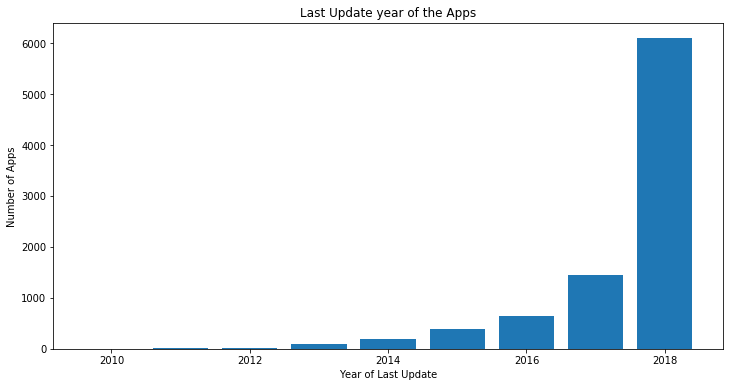

In [26]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(updates_df['Last Updated'], updates_df['App'])
ax.set_xlabel('Year of Last Update')
ax.set_ylabel('Number of Apps')
ax.set_title('Last Update year of the Apps')
plt.show()

I will consider any update before 2016 is an old application.

In [27]:
# Apps before 2016
df[df['Last Updated'].dt.year < 2016]['App']

58                   Restart Navigator
144                        Cool Reader
170                            Flybook
209                    Plugin:AOT v5.0
384      Hangouts Dialer - Call Phones
                     ...              
10817             HTC Sense Input - FR
10830                News Minecraft.fr
10832                         FR Tides
10833                      Chemin (fr)
10839    The SCP Foundation DB fr nn5n
Name: App, Length: 696, dtype: object

## App With the Largest Num of Installs
A clear representation of your results. You can also come up with the top list of the most installed apps. These can be represented on a horizontal bar graph.

In [28]:
# The top list of the most installed apps
top_installed = df.sort_values(by = 'Installs Num', ascending = False).head(50)

In [29]:
top_installed[['Installs Num','App']]

,Installs Num,App
5395,1000000000,Google Photos
391,1000000000,Skype - free IM & video calls
3816,1000000000,Google News
2853,1000000000,Google Photos
3234,1000000000,Google
3909,1000000000,Instagram
3223,1000000000,Maps - Navigate & Explore
3736,1000000000,Google News
3687,1000000000,Google Play Movies & TV
411,1000000000,Google Chrome: Fast & Secure


## App With Large Number of Reviews
A clear representation of your results. You can also come up with the top 10 list of apps that have many reviews.

In [30]:
# The top 10 list of apps that have many reviews.
top10_reviewed = df.sort_values(by = 'Reviews', ascending = False).head(10)

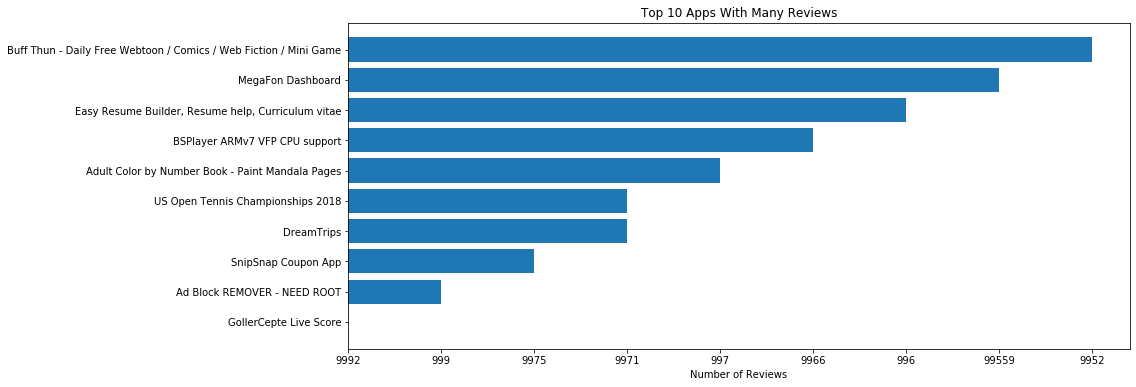

In [31]:
# Show chart with the top 10 list of apps that have many reviews.
fig, ax = plt.subplots(figsize = (14, 6))
ax.barh(top10_reviewed['App'], top10_reviewed['Reviews'])
ax.set_xlabel('Number of Reviews')
ax.set_title('Top 10 Apps With Many Reviews')
plt.show()